(content:code-outputs)=

# 格式化代码输出

代码输出的格式化是高度可配置的。下面我们给出一些示例，说明如何格式化特定输出，甚至如何将输出插入到文档的其他位置。

[MyST 备忘单](myst_cheatsheet) 提供了 [可用的 `code-cell` 标签列表](myst_cheatsheet:code-cell:tags)

:::{seealso}
[MyST-NB 文档](myst-nb:use/format/cutomise)，关于如何完全定制输出渲染器。
:::

(content:code-outputs:library-outputs)=
## 库输出格式化

许多库都支持自己的 HTML 输出格式，这通常也适用于 Jupyter Book 输出。

例如，下面的单元格使用 Pandas 基于它们的值格式化单元格：

In [1]:
import numpy as np
import pandas as pd

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    set_table_attributes('style="font-size: 10px"')

有关样式化 DataFrames 的更多信息，请参阅 [Pandas styles 文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)，并查看您选择的库的文档，看看它们是否支持类似的特性。

(content:code-outputs:scrolling)=
## 滚动单元输出

传统的 Jupyter Notebook 界面允许您为单元格切换**输出滚动**。这允许您可视化长输出的一部分，而不会占用整个页面。

你可以在 Jupyter Book 中通过添加以下标签到单元格的元数据来触发这种行为：

```json
{
    "tags": [
        "output_scroll",
    ]
}
```

例如，下面的单元格有一个很长的输出，但是可以在书中滚动：

In [2]:
for ii in range(40):
    print(f"this is output line {ii}")

this is output line 0
this is output line 1
this is output line 2
this is output line 3
this is output line 4
this is output line 5
this is output line 6
this is output line 7
this is output line 8
this is output line 9
this is output line 10
this is output line 11
this is output line 12
this is output line 13
this is output line 14
this is output line 15
this is output line 16
this is output line 17
this is output line 18
this is output line 19
this is output line 20
this is output line 21
this is output line 22
this is output line 23
this is output line 24
this is output line 25
this is output line 26
this is output line 27
this is output line 28
this is output line 29
this is output line 30
this is output line 31
this is output line 32
this is output line 33
this is output line 34
this is output line 35
this is output line 36
this is output line 37
this is output line 38
this is output line 39


(content:code-outputs:images)=
## 图像

对于代码输出的任何图像类型，我们都可以通过单元格元数据应用格式。然后，对于图像，我们可以应用标准 [图像指令](https://docutils.sourceforge.io/docs/ref/rst/directives.html#image) 的所有变量：

```{margin}
长度的单位是：'em', 'ex', 'px', 'in', 'cm', 'mm', 'pt', 'pc'
```

- **width**: 当前行宽的长度或百分比(%)
- **height**: 长度
- **scale**: 整数百分比(“%”符号是可选的)
- **align**: "top", "middle", "bottom", "left", "center", 或者 "right"
- **classes**: 空格分隔的字符串
- **alt**: 字符串

我们还可以设置一个 caption（呈现为 [CommonMark](https://commonmark.org/)）和 name，通过它们来引用图像。代码

````md
```{code-cell} ipython3
---
render:
  image:
    width: 200px
    alt: fun-fish
    classes: shadow bg-primary
  figure:
    caption: |
      Hey everyone its **party** time!
    name: fun-fish
---
from IPython.display import Image
Image("../images/fun-fish.png")
```
````

生成以下代码单元格和图像：

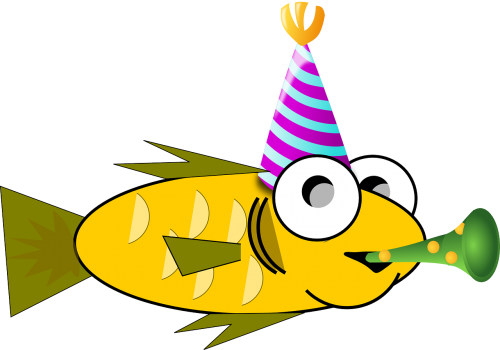

In [3]:
from IPython.display import Image
Image("../images/fun-fish.png")

现在我们可以从文档中的任何地方链接到该图像：[swim to the fish](fun-fish)

:::{seealso}
[](jupyter-cell-tags)
:::

(content:code-outputs:markdown)=
## Markdown

Markdown 输出由 MyST-Parser 解析，目前解析设置为严格的 [CommonMark](https://commonmark.org/)。

然后，解析后的 Markdown 被集成到文档的更广泛的上下文中。这意味着它是可能的，例如，包括内部引用：

In [4]:
from IPython.display import display, Markdown
display(Markdown('**_some_ markdown** and an [internal reference](use/format/markdown)!'))

**_some_ markdown** and an [internal reference](use/format/markdown)!

甚至内部图像也可以渲染，如下面的代码所示：

In [5]:
display(Markdown('![figure](../images/logo-wide.svg)'))

![figure](../images/logo-wide.svg)

(content:code-outputs:ansi)=
## ANSI 输出

默认情况下，标准 output/error 流和 text/plain MIME 输出可能包含用于更改文本和背景颜色的 ANSI 转义序列。

In [6]:
import sys
print("BEWARE: \x1b[1;33;41mugly colors\x1b[m!", file=sys.stderr)
print("AB\x1b[43mCD\x1b[35mEF\x1b[1mGH\x1b[4mIJ\x1b[7m"
      "KL\x1b[49mMN\x1b[39mOP\x1b[22mQR\x1b[24mST\x1b[27mUV")

ABCDEFGHIJKLMNOPQRSTUV


BEWARE: ugly colors!


这使用内置的 {py:class}`~myst-nb:myst_nb.ansi_lexer.AnsiColorLexer` [pygments lexer](https://pygments.org/)。您可以更改 `_config.yml` 文件中使用的 lexer，例如关闭词法分析:

```yaml
sphinx:
  config:
    nb_render_text_lexer: "none"
```

下面的代码显示了它所基于的 8 种基本的 ANSI 颜色。这 8 种颜色中的每一种都有一个“强烈的”变化，用于粗体文本。

In [7]:
text = " XYZ "
formatstring = "\x1b[{}m" + text + "\x1b[m"

print(
    " " * 6
    + " " * len(text)
    + "".join("{:^{}}".format(bg, len(text)) for bg in range(40, 48))
)
for fg in range(30, 38):
    for bold in False, True:
        fg_code = ("1;" if bold else "") + str(fg)
        print(
            " {:>4} ".format(fg_code)
            + formatstring.format(fg_code)
            + "".join(
                formatstring.format(fg_code + ";" + str(bg)) for bg in range(40, 48)
            )
        )

            40   41   42   43   44   45   46   47  
   30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;30  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;31  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;32  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;33  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;34  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;35  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;36  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
   37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 
 1;37  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ  XYZ 


:::{note}
ANSI 还支持一组 256 种索引颜色。目前还不支持此功能，但我们希望稍后引入它（如果您需要它，可以在存储库上提出议题！）。
ANSI also supports a set of 256 indexed colors.
:::

(content:code-outputs:priority)=
## 渲染优先级

当 Jupyter 执行一个代码单元时，它可以产生多个输出，每个输出可以包含多个 [MIME 媒体类型](https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types)，用于不同的输出格式（如 HTML 或 LaTeX）。

MyST-NB 为大多数常见的[输出构建器](https://www.sphinx-doc.org/en/master/usage/builders/index.html)存储了一个默认的优先级字典，你也可以在 `_config.yml` 中更新它。例如，这是 HTML 的默认优先级列表：

```yaml
sphinx:
  config:
    nb_render_priority:
      html:
      - "application/vnd.jupyter.widget-view+json"
      - "application/javascript"
      - "text/html"
      - "image/svg+xml"
      - "image/png"
      - "image/jpeg"
      - "text/markdown"
      - "text/latex"
      - "text/plain"
```